In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('Assignment2023.sqlite')
train_df = pd.read_sql_query("SELECT * FROM train", conn)
test_df = pd.read_sql_query("SELECT * FROM test", conn)
conn.close()

print(train_df.head())

print(test_df.head())

   index       Att00      Att01      Att02      Att03  Att04       Att05  \
0      0  -31.576673  -9.700301 -24.911617   9.081612      0  208.272079   
1      1 -304.662214  46.607701  42.598150 -56.799268      1 -150.590555   
2      2  -32.937870 -13.109089 -60.390007 -39.580707      1 -154.421152   
3      3  -78.472517  12.418401 -76.958786 -17.175313      0  222.140482   
4      4 -141.399086  29.659121 -64.726164  -3.185066      1  116.402384   

      Att06     Att07      Att08  ...  Att21      Att22     Att23     Att24  \
0 -1.997841  1.454936 -26.600721  ...    952  11.266068 -3.217048  1.783540   
1  3.867761 -2.494264  11.174107  ...    101   8.088683  6.228109       NaN   
2 -3.761358 -0.980815  -6.615842  ...   -304  -8.360235 -6.056773       NaN   
3  3.870460  7.106521  -8.966390  ...   -352  -4.049348  6.232455       NaN   
4 -4.440180  4.239060   6.792401  ...    923  20.884454 -7.149853  1.635977   

   Att25  Att26      Att27      Att28      Att29  class  
0   CDJW  

In [4]:
duplicates = train_df[train_df.duplicated(keep=False)]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [index, Att00, Att01, Att02, Att03, Att04, Att05, Att06, Att07, Att08, Att09, Att10, Att11, Att12, Att13, Att14, Att15, Att16, Att17, Att18, Att19, Att20, Att21, Att22, Att23, Att24, Att25, Att26, Att27, Att28, Att29, class]
Index: []

[0 rows x 32 columns]


In [6]:
def find_duplicate_columns(df):
    duplicate_columns = set()
    for i in range(df.shape[1]):
        for j in range(i + 1, df.shape[1]):
            col1 = df.iloc[:, i]
            col2 = df.iloc[:, j]
            if col1.equals(col2):
                duplicate_columns.add(df.columns[i])
                duplicate_columns.add(df.columns[j])
    return duplicate_columns

duplicate_columns_train = find_duplicate_columns(train_df)
print("Duplicate Columns in train_df: ", duplicate_columns_train)

duplicate_columns_test = find_duplicate_columns(test_df)
print("Duplicate Columns in test_df: ", duplicate_columns_test)

Duplicate Columns in train_df:  set()
Duplicate Columns in test_df:  set()


In [8]:
def missing(train_df):
    missing_dict = dict()
    total = train_df.shape[0]
    for attribute in train_df.columns:  
        missing = train_df[attribute].isna().sum()  
        frac = missing / total * 100
        missing_dict[attribute] = frac
    return missing_dict  

In [10]:
m_dict = missing(train_df)
m_dict

{'index': 0.0,
 'Att00': 0.0,
 'Att01': 0.0,
 'Att02': 0.0,
 'Att03': 0.0,
 'Att04': 0.0,
 'Att05': 0.0,
 'Att06': 0.0,
 'Att07': 1.0,
 'Att08': 0.0,
 'Att09': 0.0,
 'Att10': 0.0,
 'Att11': 0.0,
 'Att12': 0.0,
 'Att13': 0.0,
 'Att14': 0.0,
 'Att15': 19.84,
 'Att16': 0.0,
 'Att17': 0.0,
 'Att18': 0.0,
 'Att19': 0.0,
 'Att20': 0.0,
 'Att21': 0.0,
 'Att22': 0.0,
 'Att23': 0.0,
 'Att24': 59.199999999999996,
 'Att25': 0.0,
 'Att26': 0.0,
 'Att27': 0.0,
 'Att28': 0.0,
 'Att29': 0.0,
 'class': 0.0}

In [12]:
train_df['Att07'].fillna(train_df['Att07'].mode()[0], inplace=True)
train_df['Att15'].fillna(train_df['Att15'].median(), inplace=True)
train_df.drop(columns=['Att24'], inplace=True)

In [14]:
m_dict = missing(train_df)
m_dict

{'index': 0.0,
 'Att00': 0.0,
 'Att01': 0.0,
 'Att02': 0.0,
 'Att03': 0.0,
 'Att04': 0.0,
 'Att05': 0.0,
 'Att06': 0.0,
 'Att07': 0.0,
 'Att08': 0.0,
 'Att09': 0.0,
 'Att10': 0.0,
 'Att11': 0.0,
 'Att12': 0.0,
 'Att13': 0.0,
 'Att14': 0.0,
 'Att15': 0.0,
 'Att16': 0.0,
 'Att17': 0.0,
 'Att18': 0.0,
 'Att19': 0.0,
 'Att20': 0.0,
 'Att21': 0.0,
 'Att22': 0.0,
 'Att23': 0.0,
 'Att25': 0.0,
 'Att26': 0.0,
 'Att27': 0.0,
 'Att28': 0.0,
 'Att29': 0.0,
 'class': 0.0}

In [30]:
def missing(test_df):
    missing_dict = dict()
    total = test_df.shape[0]
    for attribute in test_df.columns:
        missing = test_df[attribute].isna().sum() 
        frac = missing / total * 100
        missing_dict[attribute] = frac
    return missing_dict  


In [32]:
m_dict = missing(test_df)
print(m_dict)

{'index': 0.0, 'Att00': 0.0, 'Att01': 0.0, 'Att02': 0.0, 'Att03': 0.0, 'Att04': 0.0, 'Att05': 0.0, 'Att06': 0.0, 'Att07': 0.0, 'Att08': 0.0, 'Att09': 0.0, 'Att10': 0.0, 'Att11': 0.0, 'Att12': 0.0, 'Att13': 0.0, 'Att14': 0.0, 'Att15': 0.0, 'Att16': 0.0, 'Att17': 0.0, 'Att18': 0.0, 'Att19': 0.0, 'Att20': 0.0, 'Att21': 0.0, 'Att22': 0.0, 'Att23': 0.0, 'Att24': 0.0, 'Att25': 0.0, 'Att26': 0.0, 'Att27': 0.0, 'Att28': 0.0, 'Att29': 0.0, 'class': 100.0}


In [18]:
for col in train_df.columns:
    print(col, train_df[col].unique())

index [   0    1    2 ... 4997 4998 4999]
Att00 [ -31.57667311 -304.66221413  -32.93786979 ... -120.21134025 -150.86624805
  -55.45231751]
Att01 [ -9.70030092  46.60770105 -13.10908918 ...  47.56762973 -43.82728091
 -89.48550865]
Att02 [-24.91161724  42.59814964 -60.39000688 ...  -3.38037604  42.4749483
 117.65153038]
Att03 [  9.08161199 -56.79926844 -39.580707   ...  -7.43061927 -12.9718222
 -17.76115013]
Att04 [0 1]
Att05 [ 208.27207889 -150.59055517 -154.42115204 ...  -52.58635183 -126.06593842
  -48.40531066]
Att06 [-1.99784119  3.86776147 -3.76135846 ... -0.90713034 -3.92466304
 -7.17308636]
Att07 [ 1.45493643 -2.49426378 -0.98081487 ...  2.18198077 -2.42831076
 -3.27606162]
Att08 [-26.60072106  11.17410672  -6.61584153 ...  14.64081842 -12.61520472
  -9.80332787]
Att09 [-1.47007647  5.98679126 -6.89493119 ... -7.65921309  0.18070196
 -7.08560237]
Att10 [-12.41254741  -3.88630149   0.4885087  ...  23.80298259  -2.83394799
  -2.68563746]
Att11 ['NBAE' 'USGL' 'AQDH' 'LCAS' 'QQNT' 'K

In [20]:
print(train_df.dtypes)

index      int64
Att00    float64
Att01    float64
Att02    float64
Att03    float64
Att04      int64
Att05    float64
Att06    float64
Att07    float64
Att08    float64
Att09    float64
Att10    float64
Att11     object
Att12      int64
Att13    float64
Att14    float64
Att15    float64
Att16     object
Att17    float64
Att18    float64
Att19    float64
Att20    float64
Att21      int64
Att22    float64
Att23    float64
Att25     object
Att26      int64
Att27    float64
Att28    float64
Att29    float64
class    float64
dtype: object


In [32]:
for col in ["Att11", "Att16", "Att25"]:
    num_unique_values = train_df[col].nunique()
    num_total_values = len(train_df[col])
    if num_unique_values / num_total_values < 0.05: 
        train_df[col] = train_df[col].astype("category")

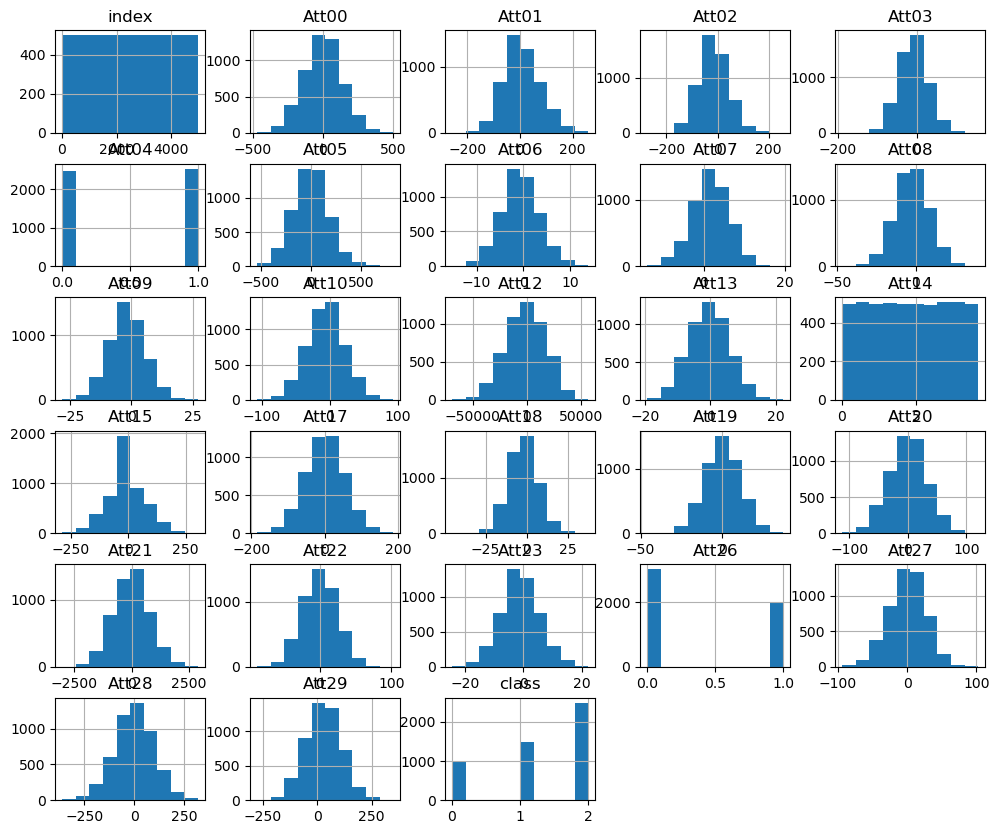

In [22]:
import matplotlib.pyplot as plt
train_df.hist(figsize=(12, 10))
plt.show()

In [24]:
numeric_attributes = train_df.select_dtypes(include='number').columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_df[numeric_attributes])
train_df[numeric_attributes] = scaler.transform(train_df[numeric_attributes])


In [26]:
print(train_df.describe())


             index         Att00         Att01         Att02         Att03  \
count  5000.000000  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean      0.000000 -2.842171e-18  1.136868e-17 -2.344791e-17 -5.684342e-18   
std       1.000100  1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+00   
min      -1.731704 -3.439657e+00 -3.777564e+00 -4.390103e+00 -4.855272e+00   
25%      -0.865852 -6.679662e-01 -6.968988e-01 -6.689247e-01 -6.884856e-01   
50%       0.000000  7.296590e-03 -8.688177e-02 -4.662639e-02 -6.761036e-03   
75%       0.865852  6.582322e-01  6.338171e-01  6.081789e-01  6.608231e-01   
max       1.731704  3.662492e+00  3.560076e+00  4.598630e+00  4.421461e+00   

              Att04         Att05         Att06         Att07         Att08  \
count  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03  5.000000e+03   
mean  -5.684342e-18  1.492140e-17  1.563194e-17 -3.481659e-17  4.263256e-17   
std    1.000100e+00  1.000100e+00  1.000100e+00  1.000100e+0

In [34]:
for col in ["Att11", "Att16", "Att25"]:
    num_unique_values = train_df[col].nunique()
    num_total_values = len(train_df[col])
    if num_unique_values / num_total_values < 0.05: 
        train_df[col] = train_df[col].astype("category")

In [36]:
train_df = train_df.apply(pd.to_numeric, downcast="float", errors="ignore")
train_df = train_df.apply(pd.to_numeric, downcast="integer", errors="ignore")


In [38]:
print(train_df.dtypes)

index    float32
Att00    float32
Att01    float32
Att02    float32
Att03    float32
Att04    float32
Att05    float32
Att06    float32
Att07    float32
Att08    float32
Att09    float32
Att10    float32
Att11     object
Att12    float32
Att13    float32
Att14    float32
Att15    float32
Att16     object
Att17    float32
Att18    float32
Att19    float32
Att20    float32
Att21    float32
Att22    float32
Att23    float32
Att25     object
Att26    float32
Att27    float32
Att28    float32
Att29    float32
class    float32
dtype: object


In [40]:
print(train_df['Att11'].unique())
print(train_df['Att16'].unique())
print(train_df['Att25'].unique())


['NBAE' 'USGL' 'AQDH' 'LCAS' 'QQNT' 'KRNB' 'NAAU']
['ITRV' 'PWEH' 'YNCP' 'XCYU' 'FBLE' 'ZFBS' 'VVQP' 'QKNH' 'YCQC']
['CDJW' 'ASCZ' 'VVFP']


In [42]:
train_df['Att11'] = train_df['Att11'].astype('category')
train_df['Att16'] = train_df['Att16'].astype('category')
train_df['Att25'] = train_df['Att25'].astype('category')


In [44]:
print(train_df.dtypes)

index     float32
Att00     float32
Att01     float32
Att02     float32
Att03     float32
Att04     float32
Att05     float32
Att06     float32
Att07     float32
Att08     float32
Att09     float32
Att10     float32
Att11    category
Att12     float32
Att13     float32
Att14     float32
Att15     float32
Att16    category
Att17     float32
Att18     float32
Att19     float32
Att20     float32
Att21     float32
Att22     float32
Att23     float32
Att25    category
Att26     float32
Att27     float32
Att28     float32
Att29     float32
class     float32
dtype: object


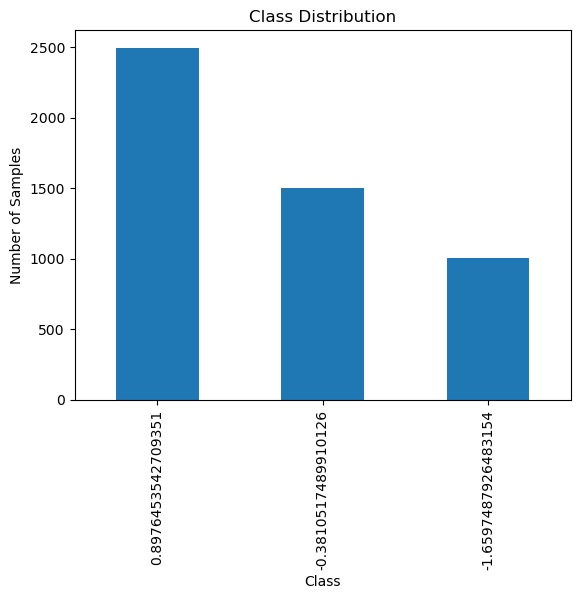

In [54]:
import matplotlib.pyplot as plt

train_df['class'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.show()


In [50]:
class_distribution = train_df['class'].value_counts()
print(class_distribution)


 0.897645    2496
-0.381052    1498
-1.659749    1006
Name: class, dtype: int64


In [68]:
print(y.unique())


[-0.38105175 -1.6597488   0.89764535]


In [71]:
y = y.astype('str')


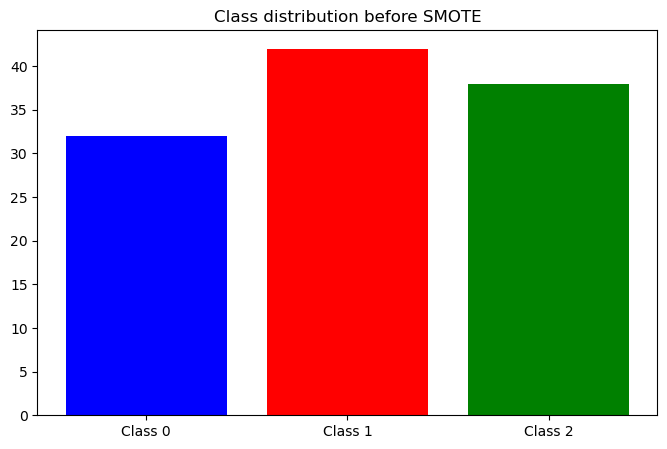

In [105]:
unique, counts = np.unique(y_train, return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(unique, counts, color=['blue', 'red', 'green'])
plt.xticks(unique, ['Class 0', 'Class 1', 'Class 2'])
plt.title('Class distribution before SMOTE')
plt.show()

In [79]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target


In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)


In [83]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


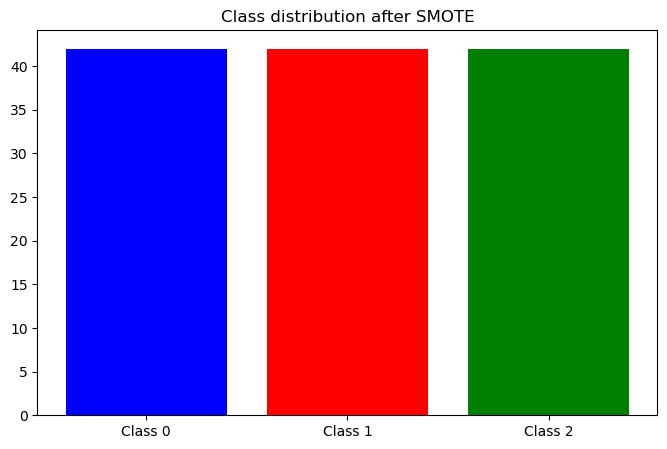

In [107]:
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(unique_resampled, counts_resampled, color=['blue', 'red', 'green'])
plt.xticks(unique_resampled, ['Class 0', 'Class 1', 'Class 2'])
plt.title('Class distribution after SMOTE')
plt.show()

In [123]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [125]:
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()

In [127]:
knn.fit(X_resampled, y_resampled)
nb.fit(X_resampled, y_resampled)
dt.fit(X_resampled, y_resampled)

DecisionTreeClassifier()

In [131]:
knn_preds = knn.predict(X_test)
nb_preds = nb.predict(X_test)
dt_preds = dt.predict(X_test)

In [133]:
knn_accuracy = accuracy_score(y_test, knn_preds)
nb_accuracy = accuracy_score(y_test, nb_preds)
dt_accuracy = accuracy_score(y_test, dt_preds)

print(f"k-NN Accuracy: {knn_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

k-NN Accuracy: 0.9737
Naive Bayes Accuracy: 0.9737
Decision Tree Accuracy: 0.9737


In [135]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

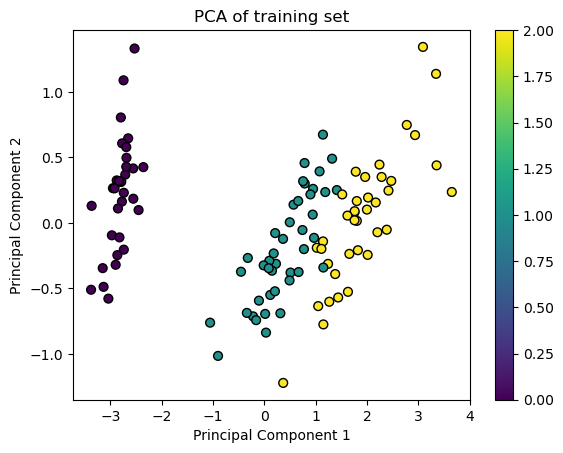

In [137]:
import matplotlib.pyplot as plt

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.colorbar()
plt.title('PCA of training set')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [139]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_pca, y_train)
y_pred = knn.predict(X_test_pca)
print("Accuracy after PCA:", accuracy_score(y_test, y_pred))


Accuracy after PCA: 0.9736842105263158


In [141]:
print(f"Explained variance by PCA components: {pca.explained_variance_ratio_}")


Explained variance by PCA components: [0.92096081 0.0538706 ]


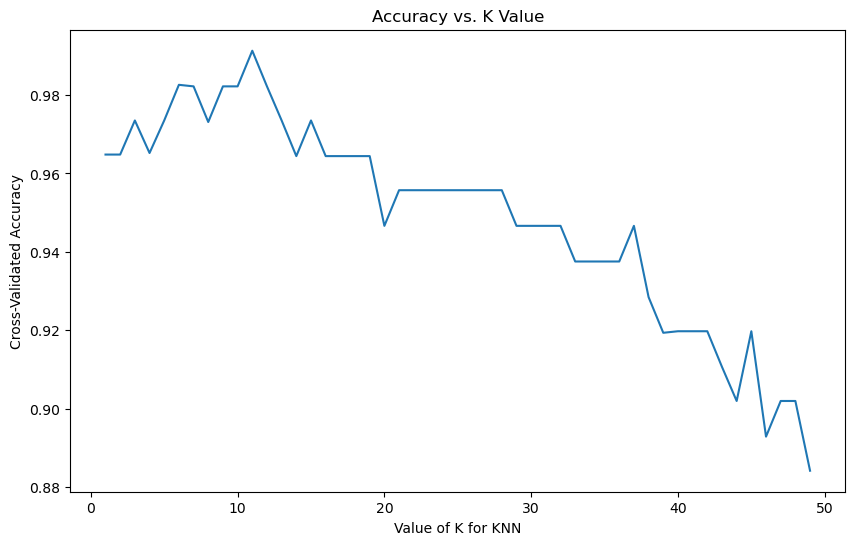

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

neighbors_range = list(range(1, 50))

cv_scores = []

for k in neighbors_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

plt.figure(figsize=(10,6))
plt.plot(neighbors_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy vs. K Value')
plt.show()


In [177]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
parameters = {
    'n_neighbors': [1, 3, 7, 11, 17, 21],  
    'weights': ['uniform', 'distance'] 
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn, parameters, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn
print("Best parameters for k-NN:", best_knn.best_params_)
print("Best cross-validation score:", best_knn.best_score_)

Best parameters for k-NN: {'n_neighbors': 11, 'weights': 'uniform'}
Best cross-validation score: 0.9913043478260869


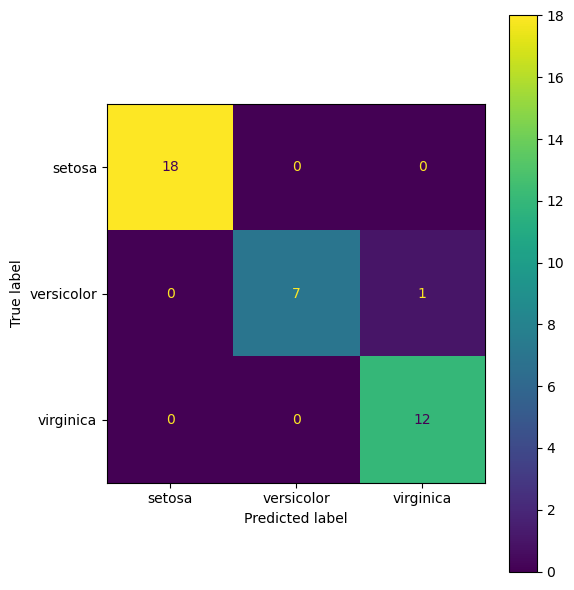

In [185]:
from sklearn.metrics import ConfusionMatrixDisplay

knn = KNeighborsClassifier(weights = best_knn.best_params_['weights'],
                           n_neighbors = best_knn.best_params_['n_neighbors'])
knn.fit(X_train, y_train)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, display_labels=iris['target_names'], ax=ax)
plt.tight_layout()
plt.show()


In [149]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

param_grid_nb = {
    'var_smoothing': np.logspace(-10, -8, 10)
}

grid_search_nb = GridSearchCV(nb, param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_pca, y_train)

print("Best parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best cross-validation score:", grid_search_nb.best_score_)


Best parameters for Naive Bayes: {'var_smoothing': 9.999999999999999e-11}
Best cross-validation score: 0.884189723320158


In [151]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

param_grid_dt = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_pca, y_train)

print("Best parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best cross-validation score:", grid_search_dt.best_score_)


Best parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best cross-validation score: 0.9739130434782609


In [157]:
from sklearn.metrics import classification_report
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
print("k-NN Performance:")
print(classification_report(y_test, knn_preds))

k-NN Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38



In [161]:
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
print("Naive Bayes Performance:")
print(classification_report(y_test, nb_preds))

Naive Bayes Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        38
   macro avg       0.96      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [163]:
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
print("Decision Tree Performance:")
print(classification_report(y_test, dt_preds))

Decision Tree Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.88      0.93         8
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.96      0.96        38
weighted avg       0.98      0.97      0.97        38

